In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/My Drive/Colab Notebooks/deeplearning_with_pytorch")

Mounted at /content/drive


Activation functions
- Are nonlinear. The nonlinearity allows the overall network to approximate more complex functions
- Are differentiable, to gradients can be computed

They also have...
- at least one sensitive range
- and insensitive range where changes to input results in little change of the output

Submodules must be top-level attributes
- otherwise, optimizer will not be able to locate the submodules
- \_\_call__ method instantiate the module
- \_\_forward__ method does the calculation 

## Neural Networks

In [2]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # unsqueeze will make each input to a seperate list
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [4]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples) # take 20 percent as validation data

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 5,  4,  0,  3,  8, 10,  6,  7,  1]), tensor([9, 2]))

In [5]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

# normalize
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [6]:
import torch.nn as nn

# exploratory model
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[2.2449],
        [2.1705]], grad_fn=<AddmmBackward>)

In [7]:
linear_model.weight # get weight

Parameter containing:
tensor([[0.3382]], requires_grad=True)

In [8]:
linear_model.bias # get bias

Parameter containing:
tensor([0.2022], requires_grad=True)

In [9]:
x = torch.ones(1)
linear_model(x)

tensor([0.5404], grad_fn=<AddBackward0>)

In [10]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.5404],
        [0.5404],
        [0.5404],
        [0.5404],
        [0.5404],
        [0.5404],
        [0.5404],
        [0.5404],
        [0.5404],
        [0.5404]], grad_fn=<AddmmBackward>)

In [11]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(), # put parameters into the model
    lr=1e-2
)

In [12]:
linear_model.parameters()

<generator object Module.parameters at 0x7ff8f23adb50>

In [13]:
list(linear_model.parameters()) # list all parameters

[Parameter containing:
 tensor([[0.8832]], requires_grad=True), Parameter containing:
 tensor([0.1621], requires_grad=True)]

In [14]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [15]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 115.1274, Validation loss 108.1410
Epoch 1000, Training loss 3.4587, Validation loss 2.7139
Epoch 2000, Training loss 2.9424, Validation loss 2.9781
Epoch 3000, Training loss 2.9340, Validation loss 3.0138

Parameter containing:
tensor([[5.4101]], requires_grad=True)
Parameter containing:
tensor([-17.3968], requires_grad=True)


In [16]:
# one can also use embedded loss function

linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 129.3235, Validation loss 127.3001
Epoch 1000, Training loss 3.4437, Validation loss 2.7180
Epoch 2000, Training loss 2.9421, Validation loss 2.9787
Epoch 3000, Training loss 2.9340, Validation loss 3.0139

Parameter containing:
tensor([[5.4102]], requires_grad=True)
Parameter containing:
tensor([-17.3973], requires_grad=True)


In [17]:
# make neural network model using sequential

seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [18]:
[param.shape for param in seq_model.parameters()] # print weights and biases

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [19]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [21]:
# can also use ordered dict
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
      ('hidden_linear', nn.Linear(1, 8)),
      ('hidden_activation', nn.Tanh()),
      ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [22]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [24]:
seq_model.output_linear.bias # access by layer name

Parameter containing:
tensor([0.0298], requires_grad=True)

In [25]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 190.5694, Validation loss 204.4682
Epoch 1000, Training loss 4.1809, Validation loss 3.8577
Epoch 2000, Training loss 1.7501, Validation loss 4.0491
Epoch 3000, Training loss 1.5200, Validation loss 3.8203
Epoch 4000, Training loss 1.4636, Validation loss 3.6918
Epoch 5000, Training loss 1.4399, Validation loss 3.6362
output tensor([[15.3617],
        [13.6981]], grad_fn=<AddmmBackward>)
answer tensor([[13.],
        [15.]])
hidden tensor([[ 0.0246],
        [ 0.0360],
        [-0.0108],
        [-0.0070],
        [ 0.0085],
        [ 0.0009],
        [ 0.0097],
        [ 0.0156]])


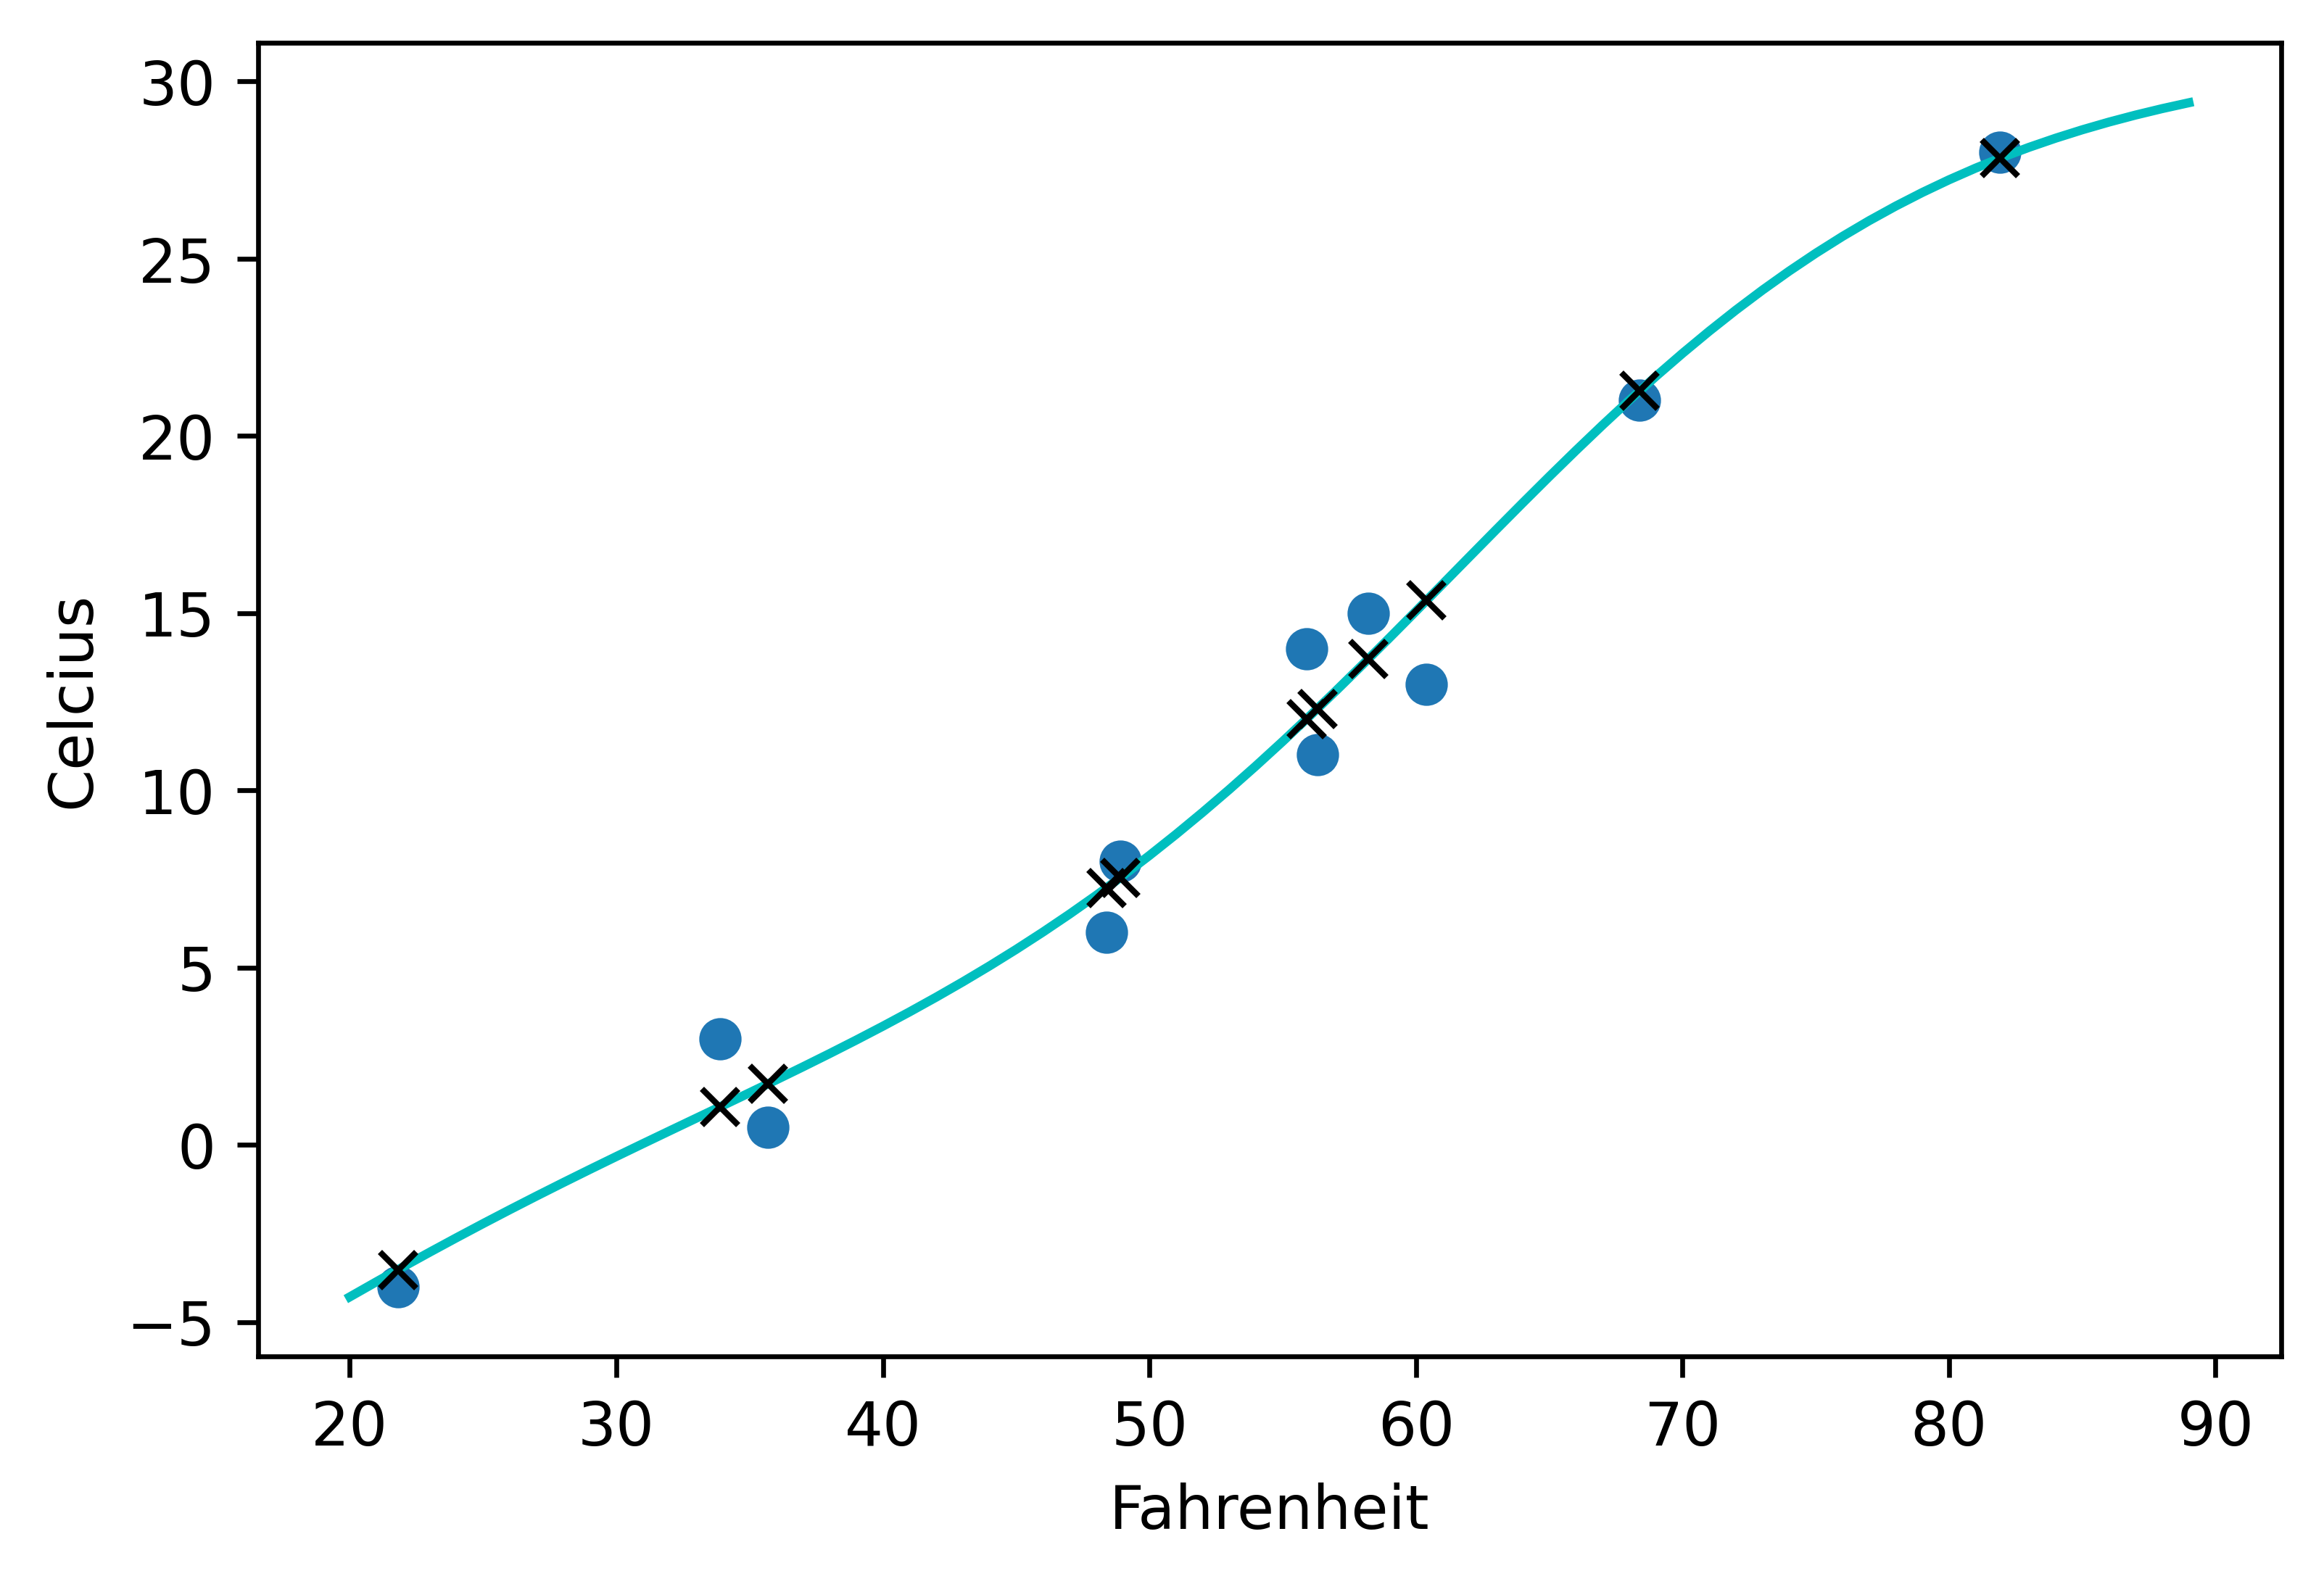

In [26]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel('Fahrenheit')
plt.ylabel('Celcius')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

# Activation functions

In [30]:
import torch.nn as nn

input_t = torch.arange(-3, 3.1, 0.1)
input_t

tensor([-3.0000e+00, -2.9000e+00, -2.8000e+00, -2.7000e+00, -2.6000e+00,
        -2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.3842e-08,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00,
         3.0000e+00])

tensor([-3.0000e-01, -2.9000e-01, -2.8000e-01, -2.7000e-01, -2.6000e-01,
        -2.5000e-01, -2.4000e-01, -2.3000e-01, -2.2000e-01, -2.1000e-01,
        -2.0000e-01, -1.9000e-01, -1.8000e-01, -1.7000e-01, -1.6000e-01,
        -1.5000e-01, -1.4000e-01, -1.3000e-01, -1.2000e-01, -1.1000e-01,
        -1.0000e-01, -9.0000e-02, -8.0000e-02, -7.0000e-02, -6.0000e-02,
        -5.0000e-02, -4.0000e-02, -3.0000e-02, -2.0000e-02, -1.0000e-02,
        -2.3842e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00,
         2.5000e+00,  2.6000e+00,  2.7000e+00,  2.8000e+00,  2.9000e+00,
         3.0000e+00])

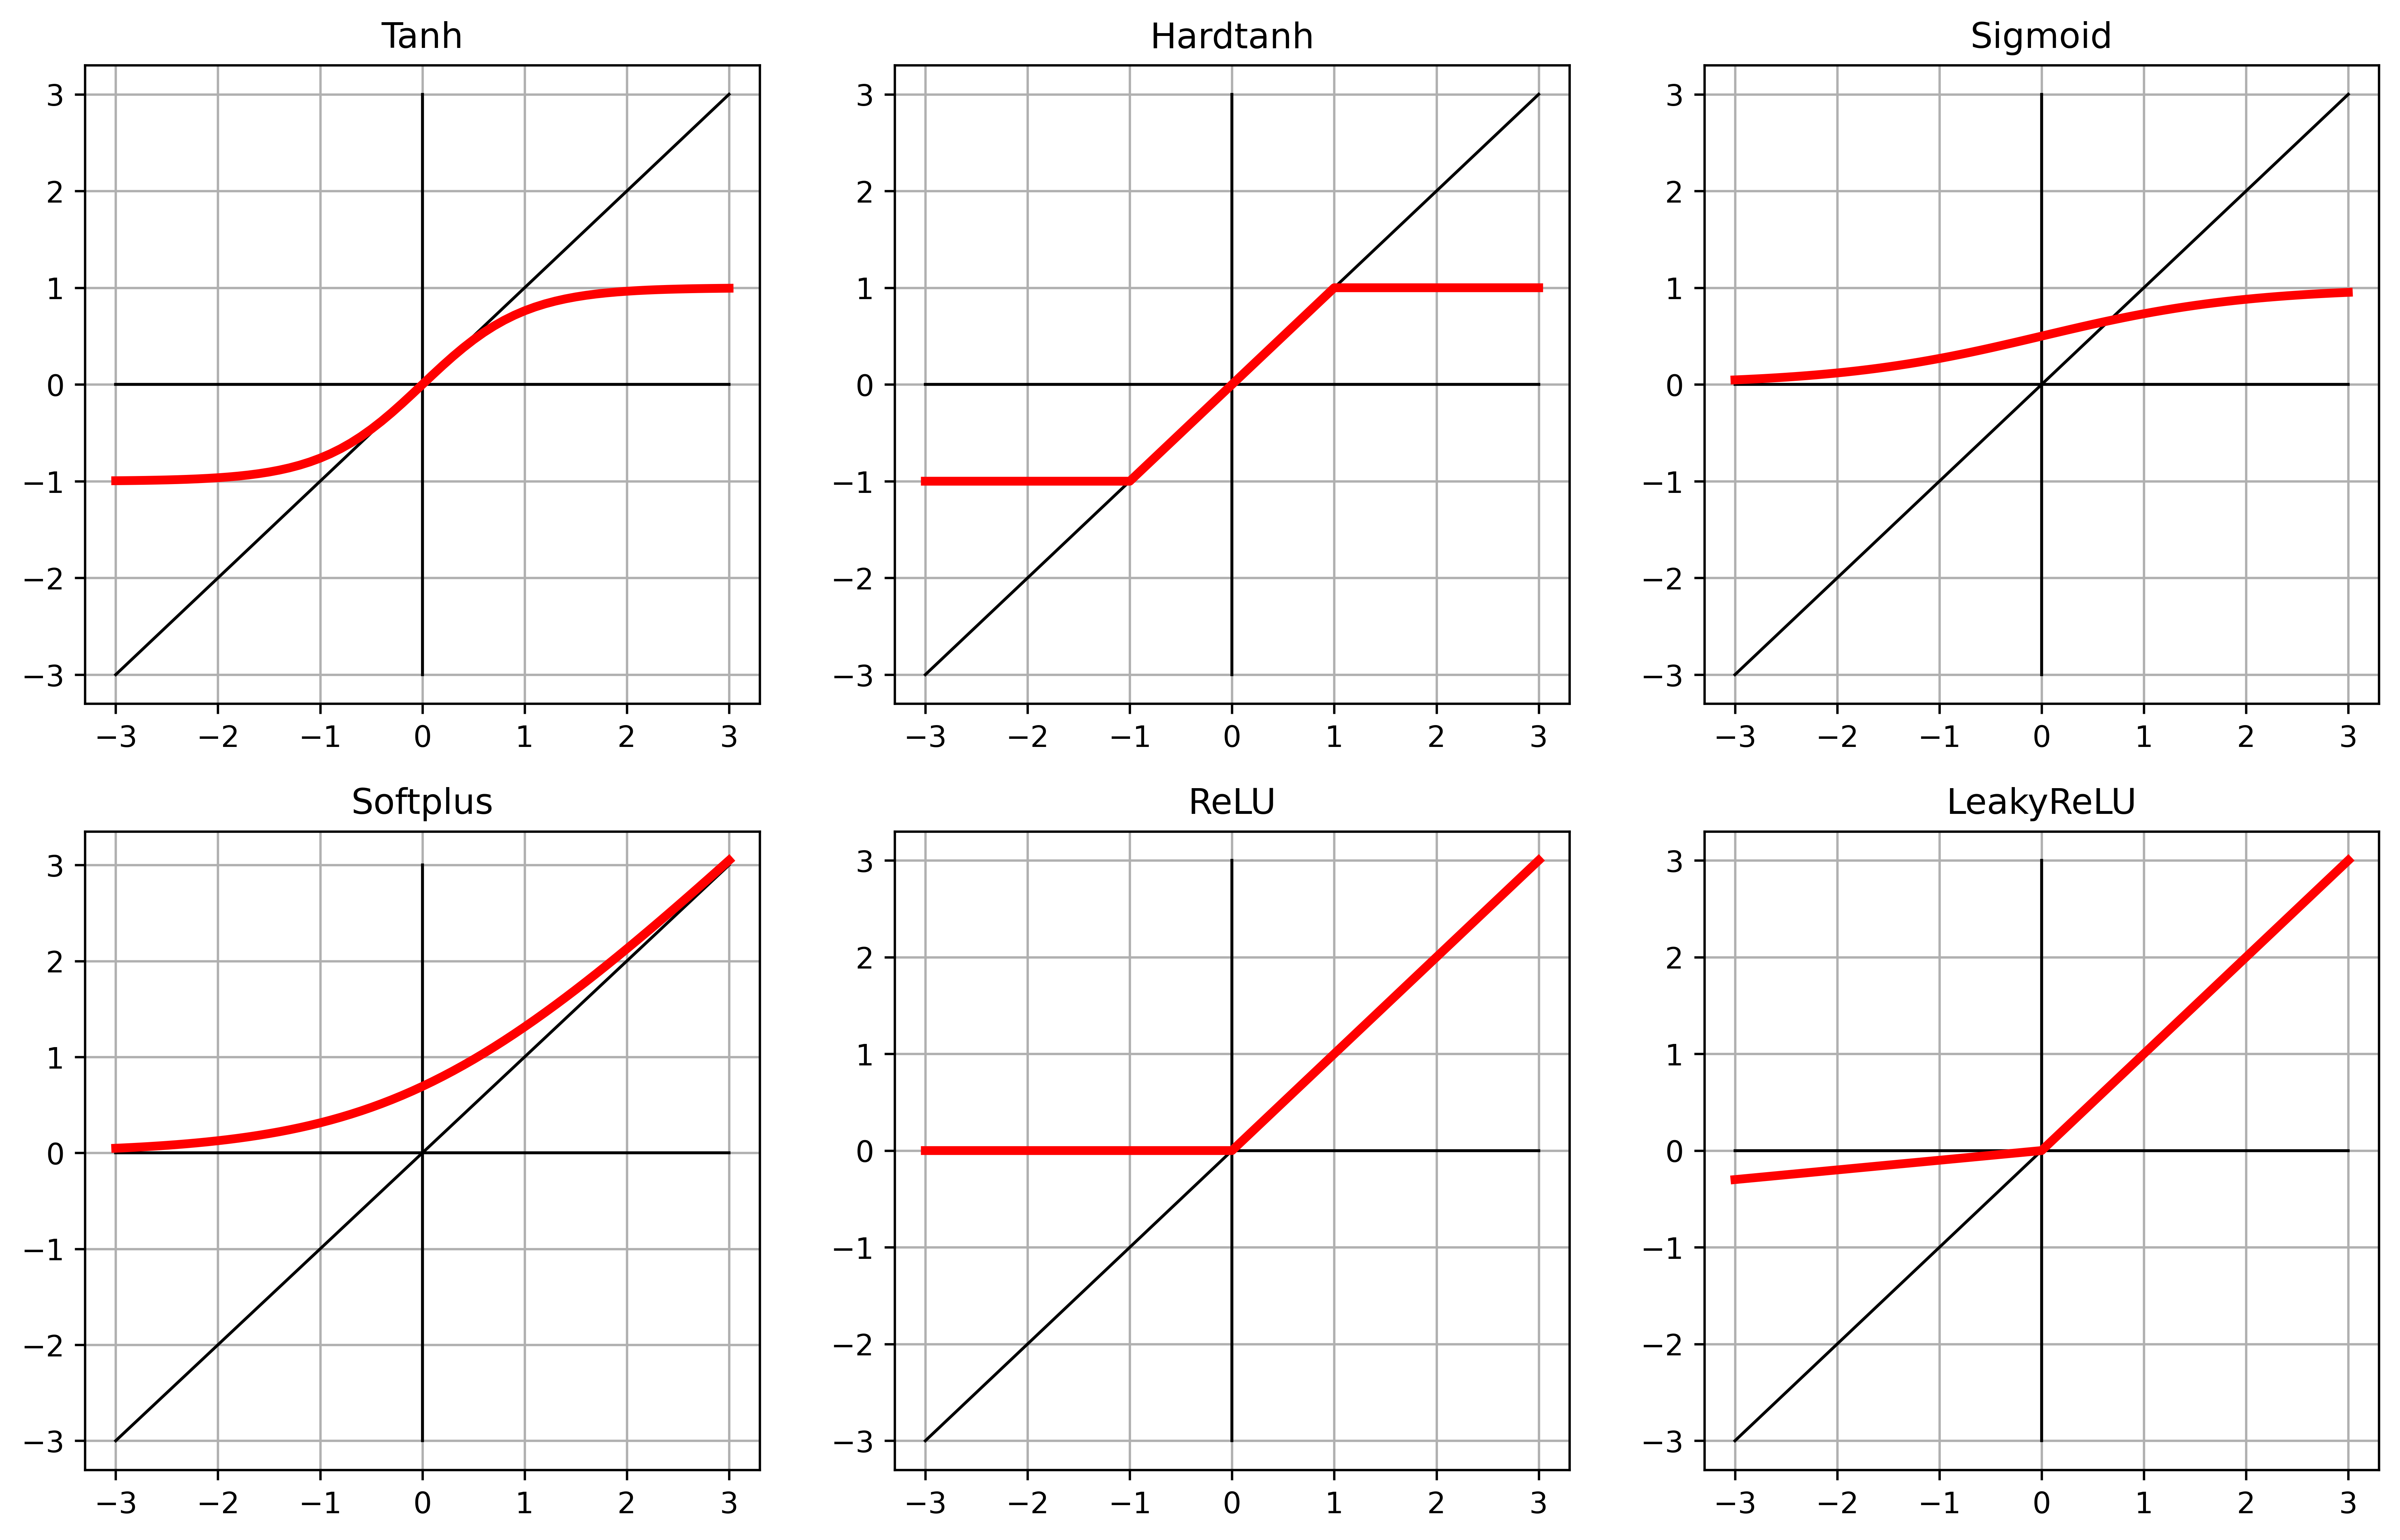

In [31]:
activation_list= [
    nn.Tanh(),
    nn.Hardtanh(),
    nn.Sigmoid(),

    nn.Softplus(),
    nn.ReLU(),
    nn.LeakyReLU(negative_slope=0.1),

    # other functions, nn.Tanhshrink(), nn.Softshrink(), nn.Hardshrink()
]

fig = plt.figure(figsize=(14, 28), dpi=600)

for i, activation_func in enumerate(activation_list):
    subplot = fig.add_subplot(len(activation_list), 3, i+1)
    subplot.set_title(type(activation_func).__name__)

    output_t = activation_func(input_t)

    plt.grid()
    plt.plot(input_t.numpy(), input_t.numpy(), 'k', linewidth=1)
    plt.plot([-3,3], [0,0], 'k', linewidth=1)
    plt.plot([0,0], [-3,3], 'k', linewidth=1)
    plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)

output_t

# nn_module subclassing

In [33]:
seq_model = nn.Sequential(
            nn.Linear(1, 11), # <1>
            nn.Tanh(),
            nn.Linear(11, 1)) # <1>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=11, bias=True)
  (1): Tanh()
  (2): Linear(in_features=11, out_features=1, bias=True)
)

In [34]:
from collections import OrderedDict

namedseq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 12)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(12 , 1))
]))

namedseq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=12, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=12, out_features=1, bias=True)
)

In [32]:
class SubclassModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden_linear = nn.Linear(1, 13)
        self.hidden_activation = nn.Tanh()
        self.output_linear = nn.Linear(13, 1)

    def forward(self, input):
        hidden_t = self.hidden_linear(input)
        activated_t = self.hidden_activation(hidden_t)
        output_t = self.output_linear(activated_t)

        return output_t

subclass_model = SubclassModel()
subclass_model

SubclassModel(
  (hidden_linear): Linear(in_features=1, out_features=13, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=13, out_features=1, bias=True)
)

In [36]:
for type_str, model in [('seq', seq_model),
                        ('namedseq', namedseq_model),
                        ('subclass', subclass_model)]:
    print(type_str)
    for name_str, param in model.named_parameters():
        print("{:21} {:19} {}".format(
            name_str, str(param.shape), param.numel()))
        
    print()

seq
0.weight              torch.Size([11, 1]) 11
0.bias                torch.Size([11])    11
2.weight              torch.Size([1, 11]) 11
2.bias                torch.Size([1])     1

namedseq
hidden_linear.weight  torch.Size([12, 1]) 12
hidden_linear.bias    torch.Size([12])    12
output_linear.weight  torch.Size([1, 12]) 12
output_linear.bias    torch.Size([1])     1

subclass
hidden_linear.weight  torch.Size([13, 1]) 13
hidden_linear.bias    torch.Size([13])    13
output_linear.weight  torch.Size([1, 13]) 13
output_linear.bias    torch.Size([1])     1



In [37]:
class SubclassFunctionalModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden_linear = nn.Linear(1, 14)

        self.output_linear = nn.Linear(14, 1)
    
    def forward(self, input):
        hidden_t = self.hidden_linear(input)
        activated_t = torch.tanh(hidden_t) # use tanh function
        output_t = self.output_linear(activated_t)

        return output_t
    
func_model = SubclassFunctionalModel()
func_model

SubclassFunctionalModel(
  (hidden_linear): Linear(in_features=1, out_features=14, bias=True)
  (output_linear): Linear(in_features=14, out_features=1, bias=True)
)